In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

#### Plotting parameters

In [103]:
params = {'legend.fontsize': 20,
          'figure.figsize': (11.5, 10.5),
          'axes.labelsize': 27,
          'axes.titlesize': 23,
          'xtick.labelsize': 27,
          'ytick.labelsize': 27,
          'image.cmap': 'jet',
          'lines.linewidth': 3,
          'lines.markersize': 7,
          'font.family': 'sans-serif'}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

#### 1) Load the data
a) Give the paths to the data in /afs/.

b) Load the values of the transverse emittance in a dictionary.

In [3]:
n_runs = 1 # number of runs that the simulation was repeated
turns = 1e5
f_rev = 43375.86 # [Hz] The revolution frequency of the machine 

In [122]:
# Noise parameters
type_of_noise = 'PN'
rms_ksi_list = [0.08, 0.2, 0.3, 0.4, 0.5, 0.6]
peak= 0.18
# tune spread
delta_rms = 2.1e-4
ayy_min = -3e5
ayy_max = 3e5
N_size = 10
ayy_list = list(np.linspace(ayy_min, ayy_max, N_size))

In [123]:
ex_dict = {} # type: dictionary
ey_dict = {}
intensity = {}
for rms_ksi in rms_ksi_list:
    print(rms_ksi) # status of file loading
    path_to_data = '/afs/cern.ch/work/n/natriant/private/sixtracklib_example_crabcavity/tbt_from_GPUs/long_rmsKsi{}/'.format(rms_ksi)
    for index, ayy in enumerate(ayy_list):
        #print(index) # status of file loading
        for run in range(n_runs):
            temp_name = 'DQ{}_rmsKsi{}_run{}'.format(ayy, rms_ksi, run) # the suffix of the name of the current study
            # A. load the turn by turn data in a dictionary
            temp_dict = pickle.load( open( path_to_data+'tbt_{}.pkl'.format(index), "rb" ) )
            # B. Create a different list for each run and save the emittance values
            ex_dict[temp_name] = temp_dict['neps_x'] 
            ey_dict[temp_name] = temp_dict['neps_y']
            intensity[temp_name]= temp_dict['intensity']

0.08
0.2
0.3
0.4
0.5
0.6


#### 2) Here the mean and the standard deviation of the emittance values are computed over all runs. 

In [124]:
ex_mean = {}
ey_mean = {}

ex_std = {}
ey_std = {}

for rms_ksi in rms_ksi_list:
    print(rms_ksi) # status of this cell's computations 
    for ayy in ayy_list:
        ex_mean['DQ{}_rmsKsi{}'.format(ayy, rms_ksi)] = []
        ey_mean['DQ{}_rmsKsi{}'.format(ayy, rms_ksi)] = []
        ex_std['DQ{}_rmsKsi{}'.format(ayy, rms_ksi)] = []
        ey_std['DQ{}_rmsKsi{}'.format(ayy, rms_ksi)] = []
        #print(ayy)
        for turn in range(int(turns)):
            ex_temp = []
            ey_temp = []

            # keep all the emittance values for all the runs
            for run in range(n_runs):
                temp_name = 'DQ{}_rmsKsi{}_run{}'.format(ayy, rms_ksi,run)
                ex_temp.append(ex_dict[temp_name][turn])
                ey_temp.append(ey_dict[temp_name][turn])
            # calculate and append the mean of the emittance value for every turn
            ex_mean['DQ{}_rmsKsi{}'.format(ayy, rms_ksi)].append(np.mean(ex_temp))
            ey_mean['DQ{}_rmsKsi{}'.format(ayy, rms_ksi)].append(np.mean(ey_temp))
            # calculate and append the standard deviation of the emittance value for every turn
            ex_std['DQ{}_rmsKsi{}'.format(ayy, rms_ksi)].append(np.std(ex_temp))
            ey_std['DQ{}_rmsKsi{}'.format(ayy, rms_ksi)].append(np.std(ey_temp))    

0.08
0.2
0.3
0.4
0.5
0.6


#### 3) Convert turns to time [s]

In [125]:
turns_list = np.arange(0,turns)
time = turns_list/f_rev # [s], type: list

#### 4) Plot evolution of the emittance for selected αyy and rms ξ values

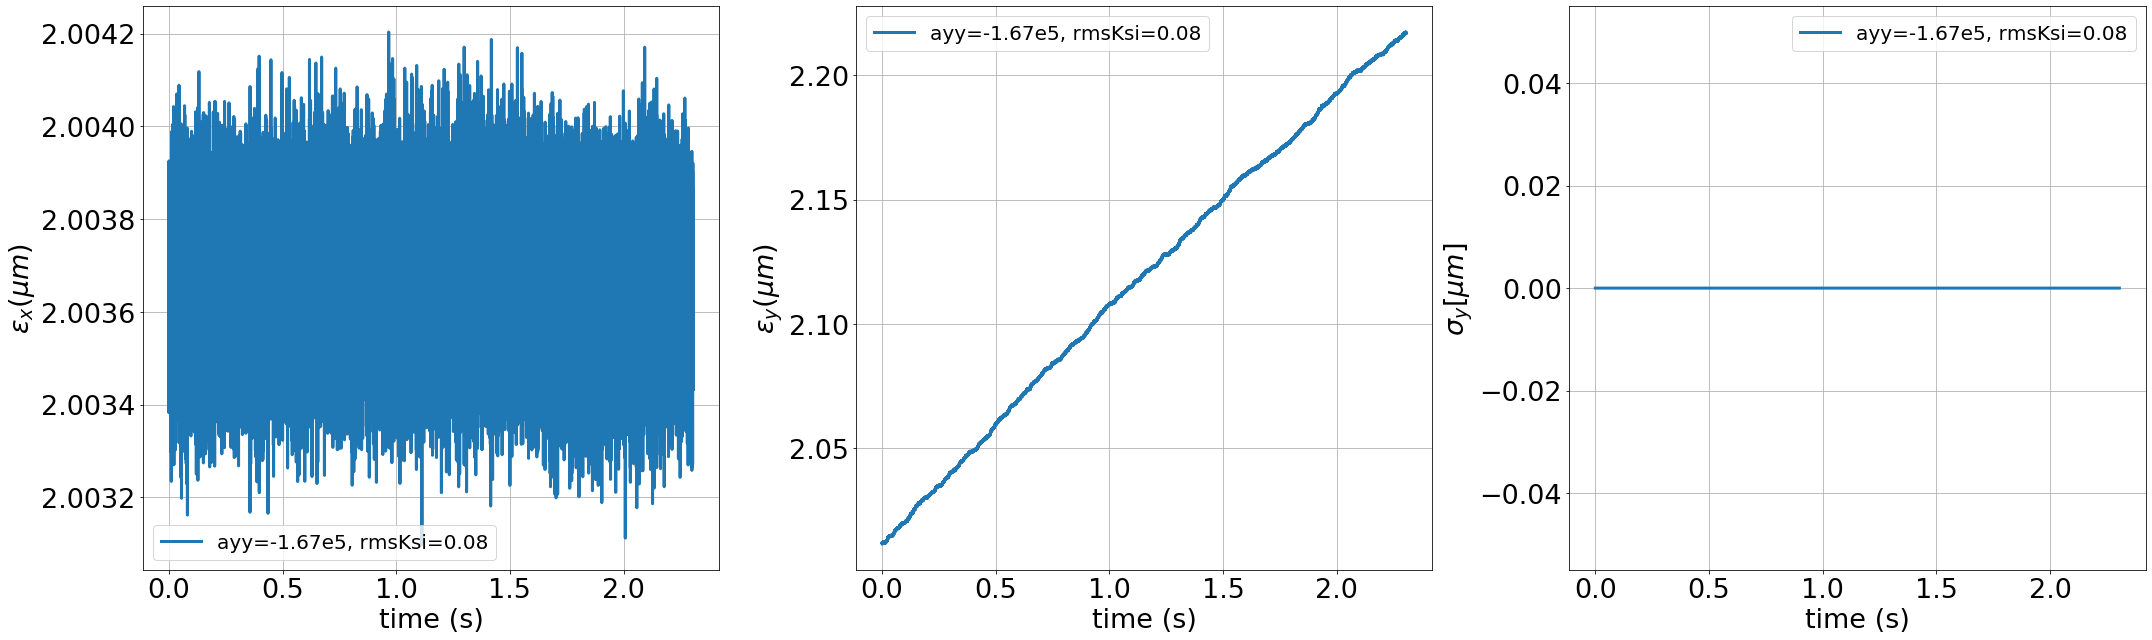

In [126]:
ayy = ayy_list[2]
rms_ksi = rms_ksi_list[0]
savefig = False

plt.figure(figsize=(30,9))

# Horizontal emittance evolution
plt.subplot(131)
plt.plot(time, np.array(ex_mean['DQ{}_rmsKsi{}'.format(ayy, rms_ksi)])*1e6, c='C0', label='ayy={:.2f}e5, rmsKsi={}'.format(ayy/1e5, rms_ksi))
plt.xlabel('time (s)')
plt.ylabel(r'$\epsilon_x (\mu m)$')
plt.grid()
plt.legend(loc='best')
plt.tight_layout()
if savefig:
    plt.savefig('H_270GeV_SPS_noCC_PN1e-8_VRF2_37MV_1e5Nb_1e5turns_ayy{}_rmsKsi{}.png'.format(ayy, rms_ksi))

# Vertical emittance evolution   
plt.subplot(132)
plt.plot(time, np.array(ey_mean['DQ{}_rmsKsi{}'.format(ayy, rms_ksi)])*1e6, c='C0', label='ayy={:.2f}e5, rmsKsi={}'.format(ayy/1e5, rms_ksi))    
plt.xlabel('time (s)')
plt.ylabel(r'$\epsilon_y (\mu m)$')
plt.legend(loc=0)
plt.grid()
plt.tight_layout()
if savefig:
    plt.savefig('V_emittance_growth_270GeV_SPS_noCC_PN1e-8_VRF2_37MV_1e5Nb_1e5turns_mean10runs.png')

# Evolution of the standard deciation for the vertical plane between the n different runs
plt.subplot(133)    
plt.plot(time, np.array(ey_std['DQ{}_rmsKsi{}'.format(ayy, rms_ksi)])*1e6, c='C0', label='ayy={:.2f}e5, rmsKsi={}'.format(ayy/1e5, rms_ksi))   
plt.xlabel('time (s)')
plt.ylabel(r'$\sigma_y [\mu m]$')
plt.legend(loc=0)
plt.grid()
plt.tight_layout()
if savefig:
    plt.savefig('V_std_270GeV_SPS_noCC_PN1e-8_VRF2_37MV_1e5Nb_1e5turns_mean10runs.png')

#### 7) Compute the emittance growth rate via a linear fit
- Polynomial fit. The degree of the fitting polynomial is 1. 
- V plane only

In [127]:
m_dict = {}
b_dict = {} 
err_dict = {}

for rms_ksi in rms_ksi_list:
    m_dict['rmsKsi{}'.format(rms_ksi)] = []
    b_dict['rmsKsi{}'.format(rms_ksi)] = []
    err_dict['rmsKsi{}'.format(rms_ksi)] = []
    
    for ayy in ayy_list:
        # linear fit
        [m_temp, b_temp], cov_temp = np.polyfit(time, ey_mean['DQ{}_rmsKsi{}'.format(ayy, rms_ksi)], 1, cov=True)
        m_dict['rmsKsi{}'.format(rms_ksi)].append(m_temp)
        b_dict['rmsKsi{}'.format(rms_ksi)].append(b_temp)
        # compute the error of the gradient of the fit slope
        err_dict['rmsKsi{}'.format(rms_ksi)].append(np.sqrt(np.diag(cov_temp)))

#### Plot the fit for an example case of tune spread

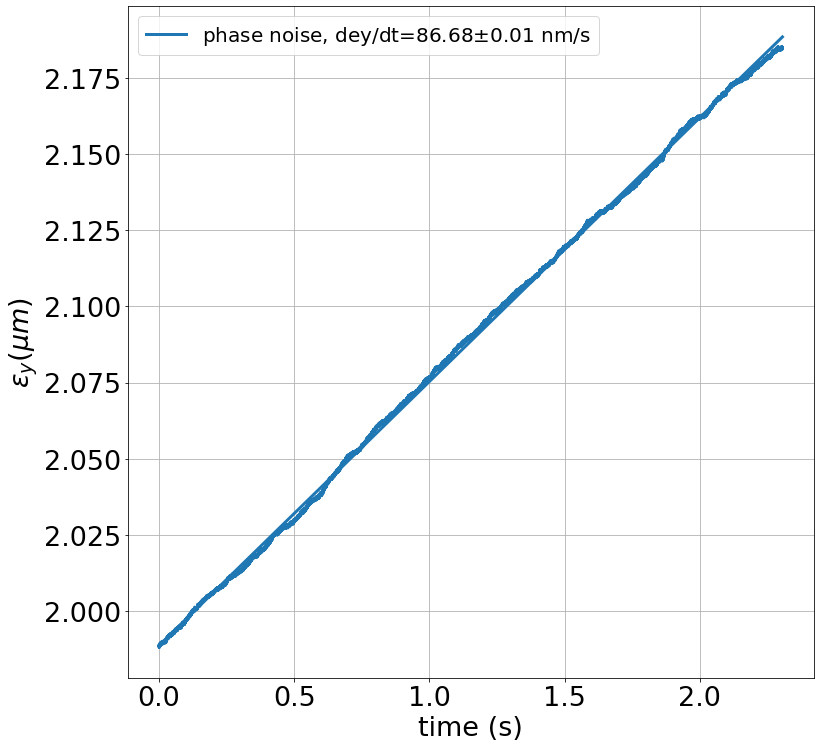

In [128]:
index = 1
ayy = ayy_list[index]
rms_ksi = rms_ksi_list[0]
plt.plot(time, np.array(ey_mean['DQ{}_rmsKsi{}'.format(ayy, rms_ksi)])*1e6, c='C0')
plt.plot(time, (m_dict['rmsKsi{}'.format(rms_ksi)][index]*time+b_dict['rmsKsi{}'.format(rms_ksi)][index])*1e6, c = 'C0', label='phase noise, dey/dt={0:.2f}'.format(m_dict['rmsKsi{}'.format(rms_ksi)][index]*1e9)+'$\pm$'+'{0:.2f} nm/s'.format(err_dict['rmsKsi{}'.format(rms_ksi)][index][0]*1e9), linewidth = 3)

plt.xlabel('time (s)')
plt.ylabel(r'$\epsilon_y (\mu m)$')
plt.legend(loc=0)
plt.grid()
plt.tight_layout()
savefig = False
if savefig:
    plt.savefig('V_emittance_growth_rate_270GeV_SPS_noCC_{}1e-8_VRF2_37MV_1e5Nb_1e5turns_mean{}runs.png'.format(type_of_noise, n_runs))

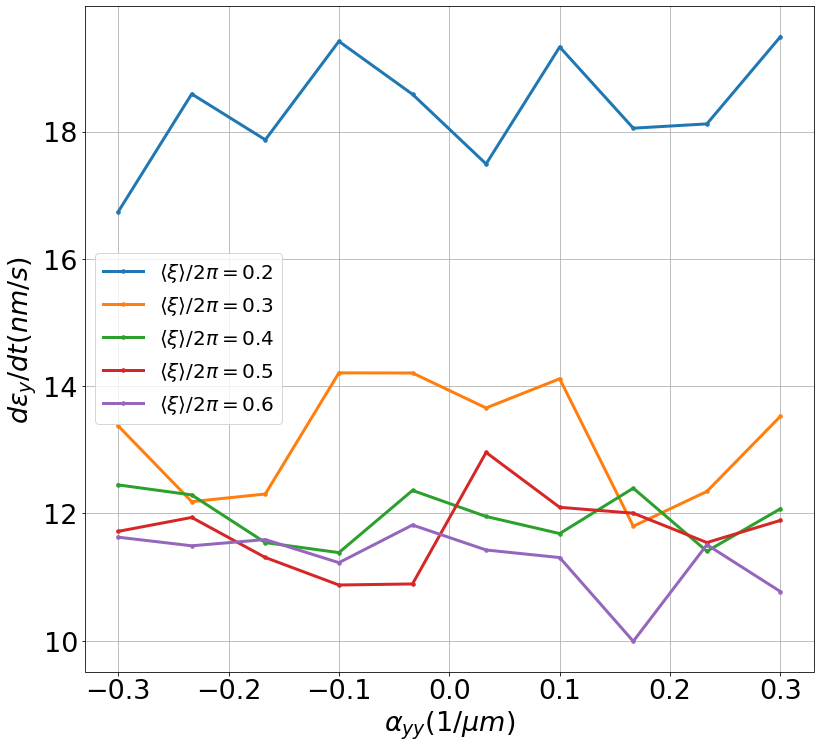

In [130]:
fig, ax = plt.subplots()
for rms_ksi in rms_ksi_list[1:]:
    ax.plot(np.array(ayy_list)/1e6, np.array(m_dict['rmsKsi{}'.format(rms_ksi)])*1e9, '.-', label=r'$\langle \xi \rangle  / 2 \pi = {} $'.format(rms_ksi))

ax.set_xlabel(r'$\alpha_{yy} (1/\mu m)$')
ax.set_ylabel(r'$d\epsilon_y /dt (nm/s)$')
#ax.ticklabel_format(axis='x', style='scientific', scilimits=(0,0))
plt.grid()
plt.legend()
plt.tight_layout()
save_fig = True
if save_fig:
    plt.savefig('emit_growth_vs_DQy_vs_rmsKsi{}_LongBunch.png'.format(rms_ksi))

#### **8) Compute the rms tune spread**
**Detuning** due to octupole non-linearity for particles with given betatron amplitudes $A_x, A_y$ is given by:

\begin{equation}
\Delta \nu_y (J_y, J_x) = \nu_y(J_y, J_x) - \nu_{y_0} = \alpha_{yy} J_y - \alpha_{yx}J_x, (1)
\end{equation}
where th transverse actions $J_y$ and $J_x$ are given by:

\begin{equation}
J_{x,y} = \frac{A^2_{x,y}}{2\beta_{x,y}(s)}, (2)
\end{equation}
where $\beta_{x,y}(s)$ the beta function at the locations $s$ of the lattice.


**In our studies:** $\alpha_{yx}=0$ and therefore the equation (1) written as:

\begin{equation}
\Delta \nu_y (J_y) \alpha_{yy} J_y, (3)
\end{equation}

Therefore, **the RMS tune spread** is given by:
\begin{equation}
\Delta \nu_y (J_y)_{RMS} = \alpha_{yy} J_{y_{RMS}}, (4)
\end{equation}

However our distribution is a Gaussian in every dimension. Thus:

\begin{equation}
J_{y_{RMS}} = \langle J_y \rangle = \epsilon_{y_{geom}}, (5)
\end{equation}

where $\epsilon_{y_{geom}}$ the geometric vertical emittance.

The **normalised emittance $\epsilon_y$** is given by:
\begin{equation}
\epsilon_y = \beta_0 \gamma_0 \epsilon_{y_{geom}}, (6)
\end{equation}

In [23]:
# Relativistic parameters of the study
gamma_0 = 287.8 
beta_0  = np.sqrt(1-1/gamma_0**2)
neps_y = 2e-6 # [m]
# Compute the initial RMS Jy. We assume that the initial normalised emittance for each study is 2μm. In reality when the distribuiton is created we don't get exaclty 2μm
print("RMS Jy={} m".format(Jy_rms))
Jy_rms = ey_geom = neps_y/(beta_0*gamma_0)# [m] 


RMS Jy=6.9493122765769245e-09 m


#### **9) Intensity**

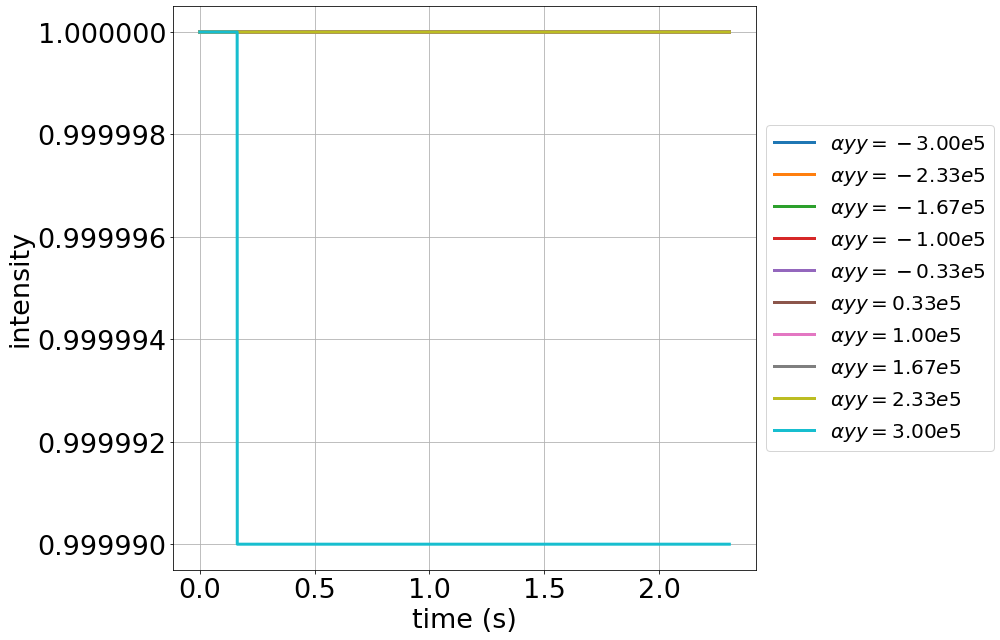

In [135]:
import matplotlib
fig = plt.figure(figsize=(14,9))
ax = plt.subplot(111)
for rms_ksi in rms_ksi_list[5:6]:
    for index, ayy in enumerate(ayy_list):
        for run in range(n_runs):
            temp_name = 'DQ{}_rmsKsi{}_run{}'.format(ayy, rms_ksi, run) # the suffix
        ax.plot(time, intensity[temp_name], label=r'$ \alpha yy = {:.2f}e5$'.format(ayy/1e5))
ax.set_ylabel('intensity')
ax.set_xlabel('time (s)')
#ax.set_yscale('log')
y_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
ax.yaxis.set_major_formatter(y_formatter)
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.grid()
save_fig = False
if save_fig:
    plt.savefig('intensity_vs_ayy_rmsKsi{}_LongBunch.png'.format(rms_ksi))